### 컬러 표기 변환기

    최초 작성일 : 20/02/09
    작성자 : 양희승
    
    작성내용 : 퍼스널컬러를 분류하기 위해 색표기를 바꾸는 코드

    수정내용 :
        20/02/14
            GBR -> RGB -> XYZ -> xyY -> munsell (코드는 정상적으로 되지만 색에 대한 신뢰가 안생김)
    
        20/02/15
            HSV 변환으로 고려중
        
        20/02/18
            나중에 함수로 쓰기 위해 코드 한 줄로 변환 후 테스트

In [1]:
# 설치
import cv2 as cv
import numpy as np
import colour
# pip install colour 가 아니다. 다른거다
# pip install colour-science  이다.
import utils
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

In [2]:
# 사진 불러오기
img = cv.imread("img/4.jpg")

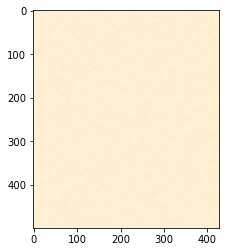

In [3]:
# 위에서 이미지 불러와서 img에 저장하면
# img는 3차원형태의 ndarray가 된다.

# return값은 height, width, channel이다.
# 이때 channel이 RGB3채널을 의미해서 3이라는 결과가 나온다.. (RGB가 아닌 BGR 순서이다.)

# 그래서 BGR  -> RGB로 바꿔준다.  헷갈리기 때문에
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
# # 그리고 차원이 분산되어있으므로 가로,세로는 하나의 array로 통합
# img = img.reshape((img.shape[0]*img.shape[1], 3))
# print(img.shape)

In [5]:
# # 알고리즘으로 이미지 학습을 시킨다.
# # scikit-learn의 k-mean 알고리즘 사용

# # k개의 데이터 평균을 만들어 clustering 할 생각

# k = 5
# clt = KMeans(n_clusters=k)
# #학습시키기
# clt.fit(img)

In [6]:
# # 테스트용으로 한가지 색밖에 없는 이미지를 사용하긴 했지만
# # 나중에 피부색을 추출하면 여러색이 분포되어있을테니 비율을 정하는 함수를 만든다.

# def color_ratio(clt) :
#     numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
#     (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    
#     hist = hist.astype("float")
#     hist /= hist.sum()
    
#     return hist

# hist = color_ratio(clt)
# print(hist)


# k=5이므로 다섯개의 영역에 얼마만큼의 퍼센테이지가 차지되었는지 return된다.


In [7]:
# def plot_colors(hist, centroids):
#     # initialize the bar chart representing the relative frequency
#     # of each of the colors
#     bar = np.zeros((50, 300, 3), dtype = "uint8")
#     startX = 0
#     # loop over the percentage of each cluster and the color of
#     # each cluster
#     for (percent, color) in zip(hist, centroids):
#         # plot the relative percentage of each cluster
#         endX = startX + (percent * 300)
#         cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
#             color.astype("uint8").tolist(), -1)
#         startX = endX
        
#     # return the bar chart
#     return bar

In [8]:
# hist = color_ratio(clt)
# bar = plot_colors(hist, clt.cluster_centers_)
# # show our color bart
# plt.figure()
# plt.axis("off")
# plt.imshow(bar)
# plt.show()

In [4]:
# 각 픽셀 단위로 색 추출하기

sum = 0
R = []
G = []
B = []
for i in img :
    for j in i :
        R.append(j[0])
        G.append(j[1])
        B.append(j[2])
        

print(max(R))  # R의 최댓값
print(max(G))  # R의 최댓값
print(max(B))  # R의 최댓값

R_sum = 0
G_sum = 0
B_sum = 0

# 각 R, G, B의 합계 구하기
for i in range(len(R)) :
    R_sum += R[i]
    G_sum += G[i]
    B_sum += B[i]


print("합계 : ", R_sum, G_sum, B_sum)

R_avg = int(round((R_sum / len(R)), 0)) # R값 평균
G_avg = int(round((G_sum / len(G)), 0))  # R값 평균
B_avg = int(round((B_sum / len(B)), 0))  # R값 평균

print("평균 : ", R_avg, G_avg, B_avg)

RGB_color = [R_avg, G_avg, B_avg]


255
245
225
합계 :  54464118 51212003 45310374
평균 :  255 239 212


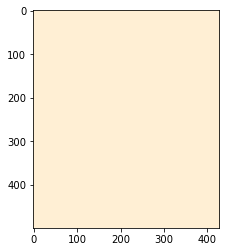

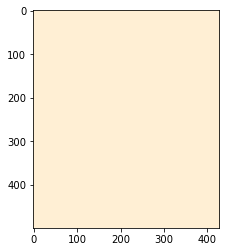

True

In [5]:
# 색을 기준으로 같은 사이즈로 새로 생성
img_avg = img

for i in img_avg :
    for j in i :
        j[0] = R_avg
        j[1] = G_avg
        j[2] = B_avg

#기존        
plt.imshow(img)
plt.show()

#평균색
plt.imshow(img_avg)
plt.show()
bgr_img_avg = cv.cvtColor(img_avg, cv.COLOR_RGB2BGR)

file_name = ""

cv.imwrite('img/4_avg_convert.jpg', bgr_img_avg)


In [9]:
# # 먼셀 변환 
# C = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']
# # 튜플 변환
# print("RGB : ", RGB_color)
# arr_RGB = np.array(RGB_color)
# arr_RGB_convert = arr_RGB/255
# tp_RGB_convert = tuple(arr_RGB_convert)


# print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.RGB_to_XYZ(RGB_color))))

In [10]:
# # 변환 과정
# print("RGB : ", RGB_color)

# XYZ = colour.sRGB_to_XYZ(tp_RGB_convert,C)
# print("XYZ : ",XYZ)



# xyY = colour.XYZ_to_xyY(XYZ)
# print("xyY : ", xyY)

# mun = colour.xyY_to_munsell_colour(xyY)
# print("mun : ", mun)

In [8]:
# # RGB로 판단하고 해보기
# np_RGB = np.array(RGB_color)
# XYZ2 = colour.RGB_to_XYZ(np_RGB)

In [7]:
# # XYZ 변환식
# X = ((0.412453*R_avg) + (0.35758*G_avg) + (0.180423*B_avg))/255
# Y = ((0.212671*R_avg) + (0.71516*G_avg) + (0.072169*B_avg))/255
# Z = ((0.019334*R_avg) + (0.119193*G_avg) + (0.950227*B_avg))/255

# np_xyz = np.array([X,Y,Z])
# np_xyz
# print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(np_xyz)))

In [11]:
# # illuminant를 기본값으로 할때
# arr_RGB = np.array(RGB_color)
# arr_RGB_convert = arr_RGB/255
# tp_RGB_convert = tuple(arr_RGB_convert)


# print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert))))


In [12]:
# # illuminant를  D65으로 할때
# D65 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D65']
# arr_RGB = np.array(RGB_color)
# arr_RGB_convert = arr_RGB/255
# tp_RGB_convert = tuple(arr_RGB_convert)


# print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D65))))


In [13]:
# # illuminant를  A로 할때
# A = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['A']
# arr_RGB = np.array(RGB_color)
# arr_RGB_convert = arr_RGB/255
# tp_RGB_convert = tuple(arr_RGB_convert)


# # print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, A))))

# ### 이건 안되네

In [14]:
# # illuminant를  D65으로 할때
# B = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['B']
# arr_RGB = np.array(RGB_color)
# arr_RGB_convert = arr_RGB/255
# tp_RGB_convert = tuple(arr_RGB_convert)


# print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, B))))


In [15]:
# # 전체
# A = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['A']
# B = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['B']
# C = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']
# D50 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D50']
# D55 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D55']
# D65 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D65']
# D75 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D75']
# E = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['E']
# F1 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL1']
# # F2 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL2']
# # F3 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL3']
# # F4 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL4']
# # F5 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL5']
# # F6 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL6']
# # F7 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL7']
# # F8 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL8']
# # F9 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL9']
# # F10 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL10']
# # F11 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL11']
# # F12 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['FL12']


# # print("munsell A : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, A))))
# print("munsell B : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, B))))
# print("munsell C : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, C))))
# print("munsell D50 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D50))))
# print("munsell D55 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D55))))
# print("munsell D65 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D65))))
# print("munsell D75 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D75))))
# print("munsell E : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, E))))
# print("munsell F1 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F1))))
# # print("munsell F2 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F2))))
# # print("munsell F3 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F3))))
# # print("munsell F4 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F4))))
# # print("munsell F5 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F5))))
# # print("munsell F6 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F6))))
# # print("munsell F7 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F7))))
# # print("munsell F8 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F8))))
# # print("munsell F9 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F9))))
# # print("munsell F10 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F10))))
# # print("munsell F11 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F11))))
# # print("munsell F12 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F12))))

In [16]:
# # 전체
# A = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['A']
# B = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['B']
# C = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['C']
# D50 = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['D50']
# D55 = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['D55']
# D65 = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['D65']
# D75 = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['D75']
# E = colour.ILLUMINANTS['CIE 1964 10 Degree Standard Observer']['E']
# # F1 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F1']
# # F2 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F2']
# # F3 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F3']
# # F4 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F4']
# # F5 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F5']
# # F6 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F6']
# # F7 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F7']
# # F8 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F8']
# # F9 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F9']
# # F10 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F10']
# # F11 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F11']
# # F12 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['F12']


# # print("munsell A : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, A))))
# print("munsell B : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, B))))
# print("munsell C : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, C))))
# print("munsell D50 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D50))))
# print("munsell D55 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D55))))
# print("munsell D65 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D65))))
# print("munsell D75 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D75))))
# print("munsell E : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, E))))
# print("munsell F1 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F1))))
# # print("munsell F2 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F2))))
# # print("munsell F3 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F3))))
# # print("munsell F4 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F4))))
# # print("munsell F5 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F5))))
# # print("munsell F6 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F6))))
# # print("munsell F7 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F7))))
# # print("munsell F8 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F8))))
# # print("munsell F9 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F9))))
# # print("munsell F10 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F10))))
# # print("munsell F11 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F11))))
# # print("munsell F12 : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F12))))

D50 이 그나마 초 근접 한거 같다.

## HSV 변환

In [31]:
# RGB_color
arr_RGB_color = np.array(RGB_color)
float_arr_RGB_color = arr_RGB_color / 255
float_tp_RGB_color = tuple(float_arr_RGB_color)
HSV_color = colour.RGB_to_HSV(float_tp_RGB_color)
print("RGB 백분율값 : ", float_tp_RGB_color)
print("HSV 백분율값 : ",HSV_color)

RGB_color2 = np.array(RGB_color)
HSV_color2 = np.array([round(HSV_color[0]*359, 3), round(HSV_color[1] * 100, 3), round(HSV_color[2] * 100, 3)])
print("RGB 값 : ", RGB_color2)
print("HSV 값 : ", HSV_color2)

RGB 백분율값 :  (1.0, 0.93725490196078431, 0.83137254901960789)
HSV 백분율값 :  [ 0.10465116  0.16862745  1.        ]
RGB 값 :  [255 239 212]
HSV 값 :  [  37.57    16.863  100.   ]


## 사진에서 뽑아온 볼의 평균색 변환


In [1]:
# 설치
import cv2 as cv
import numpy as np
import colour
# pip install colour 가 아니다. 다른거다
# pip install colour-science  이다.
import utils
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

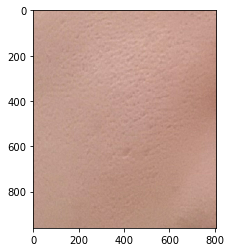

222
182
172
합계 :  149286462 117492221 106847788
평균 :  192 151 138


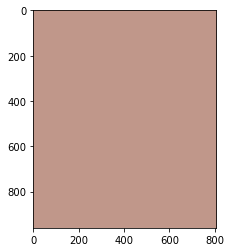

True

In [16]:
file_name = "test4"
img = cv.imread("img/"+file_name+".jpg")

# RGB 변환
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


# 평균값 추출
sum = 0
R = []
G = []
B = []
for i in img :
    for j in i :
        R.append(j[0])
        G.append(j[1])
        B.append(j[2])
        

print(max(R))  # R의 최댓값
print(max(G))  # R의 최댓값
print(max(B))  # R의 최댓값

R_sum = 0
G_sum = 0
B_sum = 0

# 각 R, G, B의 합계 구하기
for i in range(len(R)) :
    R_sum += R[i]
    G_sum += G[i]
    B_sum += B[i]


print("합계 : ", R_sum, G_sum, B_sum)

R_avg = int(round((R_sum / len(R)), 0)) # R값 평균
G_avg = int(round((G_sum / len(G)), 0))  # R값 평균
B_avg = int(round((B_sum / len(B)), 0))  # R값 평균

print("평균 : ", R_avg, G_avg, B_avg)

RGB_color = [R_avg, G_avg, B_avg]


# 평균색 기준 사진 생성
img_avg = img

for i in img_avg :
    for j in i :
        j[0] = R_avg
        j[1] = G_avg
        j[2] = B_avg



#평균색
plt.imshow(img_avg)
plt.show()
bgr_img_avg = cv.cvtColor(img_avg, cv.COLOR_RGB2BGR)

cv.imwrite("img/"+file_name+"_color.jpg", bgr_img_avg)


In [17]:
arr_RGB_color = np.array(RGB_color)
float_arr_RGB_color = arr_RGB_color / 255
float_tp_RGB_color = tuple(float_arr_RGB_color)
HSV_color = colour.RGB_to_HSV(float_tp_RGB_color)
print("RGB 백분율값 : ", float_tp_RGB_color)
print("HSV 백분율값 : ",HSV_color)

RGB_color2 = np.array(RGB_color)
HSV_color2 = np.array([round(HSV_color[0]*359, 3), round(HSV_color[1] * 100, 3), round(HSV_color[2] * 100, 3)])
print("RGB 값 : ", RGB_color2)
print("HSV 값 : ", HSV_color2)

RGB 백분율값 :  (0.75294117647058822, 0.59215686274509804, 0.54117647058823526)
HSV 백분율값 :  [ 0.04012346  0.28125     0.75294118]
RGB 값 :  [192 151 138]
HSV 값 :  [ 14.404  28.125  75.294]
